In [ ]:
!pip install nestpy
import nestpy
import numpy as np
import matplotlib.pyplot as plt



```
 NESTPy Tutorial
https://youtu.be/etUQiiQpwUI?si=CF85WA3nh_hsSTQS
```



In [ ]:
detector = nestpy.DetectorExample_XENON10()

# List of methods to inspect
methods = dir(detector)

# Filter out special methods (those starting with '__')
user_methods = [method for method in methods if not method.startswith('__')]

for method in user_methods:
    try:
        if method.startswith('get_'):  # Check if it's a getter
            value = getattr(detector, method)()  # Call the getter method
            print(f"{method}: {value}")
    except Exception as e:
        print(f"Error getting {method}: {e}")

# Optionally, you can list all setter methods or perform other checks as needed



print(dir(nestpy))
nc=nestpy.NESTcalc(detector)

get_E_gas: 12.0
get_P_dphe: 0.2
get_PosResBase: 70.8364
get_PosResExp: 0.015
get_T_Kelvin: 177.0
get_TopDrift: 150.0
get_anode: 152.5
get_cathode: 1.0
get_coinLevel: 2
get_coinWind: 100.0
get_dtCntr: 40.0
get_dt_max: 60.0
get_dt_min: 20.0
get_eLife_us: 2200.0
get_g1: 0.073
get_g1_gas: 0.0655
get_gate: 147.5
get_inGas: False
get_molarMass: 131.293
get_noiseBaseline: 0.0
get_noiseLinear: 0.03
get_noiseQuadratic: 0.0
get_numPMTs: 89
get_p_bar: 2.14
get_radius: 50.0
get_radmax: 50.0
get_s2Fano: 3.61
get_s2_thr: 300.0
get_sPEeff: 1.0
get_sPEres: 0.58
get_sPEthr: 0.35
['Alpha', 'AmBe', 'B8', 'C14', 'CH3T', 'Cf', 'DD', 'DetectorExample_XENON10', 'DriftParameters', 'ER', 'ElectronYield', 'Full', 'GetBand', 'GetEnergyRes', 'GetInteractionObject', 'GetYieldsVectorized', 'Hybrid', 'INTERACTION_TYPE', 'Kr83m', 'LArAlphaElectronYieldsParameters', 'LArAlphaPhotonYieldsParameters', 'LArAlphaYieldsParameters', 'LArERElectronYieldsAlphaParameters', 'LArERElectronYieldsBetaParameters', 'LArERElectronYie

In [ ]:
@np.vectorize

def GetYieldsVectorized(yield_type , **kwargs ):
    yield_object=nc.GetYields(**kwargs)
    return getattr(yield_object, yield_type)

def PhotonYield(**kwargs) :
  return GetYieldsVectorized(yield_type="PhotonYield",**kwargs)

def ElectronYield(**kwargs) :
  return GetYieldsVectorized(yield_type="ElectronYield",**kwargs)


In [ ]:
def nest_curve_NR(field, yield_type):
    # Generate energies from 0.5 keV to 100 keV
    energies = np.linspace(0.5, 100, 1000).reshape(-1, 1)  # 1000 points between 0.5 keV and 100 keV
    energies = np.broadcast_to(energies, (len(energies), 1))

    kwargs = {'energy': energies, 'drift_field': field}

    if yield_type == "Charge":
        yields = ElectronYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs) / energies
    elif yield_type == "Light":
        yields = PhotonYield(interaction=nestpy.INTERACTION_TYPE.NR, **kwargs) / energies
    else:
        raise ValueError("Invalid yield_type. Choose 'Charge' or 'Light'.")

    return energies, yields


In [ ]:
version_textbox='NEST v{0} \n nestpy v{1}'.format(nestpy.__nest_version__,nestpy.__version__)
bbox= dict(boxstyle='round',fc='1.00',edgecolor='none')
def yields_plot_NR(fields,yield_type,savefig=False):
  subplot1=plt.subplot(1,1,1)

  title =[yield_type,'Yields for Nuclear Recoil']
  title = ''.join(str(v) for v in title)
  subplot1.set_title (title,fontsize=20)

  for field in fields :
    name =[field,'V/cm']
    name =''.join(str(v) for v in name)
    subplot1.plot(nest_curve_NR(field,yield_type)[0],nest_curve_NR(field,yield_type)[1],label=name)

  if yield_type=='Charge':
     subtitle=[yield_type,"Yield [n$_e$/keV]"]
     plt.ylim(0,9)
     subplot1.text(5,3,version_textbox,bbox=bbox,horizontalalignment='right',fontsize=5)
    # plt.axhline(y=5.9, color='red', linestyle='--', label='y = 5.9')
     #plt.axvline(x=10, color='red', linestyle='--', label='x = 10')
     #plt.axvline(x=50, color='black', linestyle='--', label='x = 50')
     #plt.axhline(y=3.6, color='black', linestyle='--', label='y = 3.6')
  if yield_type=='Light' :
     subtitle=[yield_type,"Yield [n$_{ph}$/keV]"]
     plt.ylim(0,18)
  subplot1.legend(loc='upper left',fontsize ='small',ncol=3)
  subplot1.text(1,10,version_textbox,bbox=bbox,horizontalalignment='right',fontsize=5)
  subtitle = ''.join(str(v) for v in subtitle)
  subplot1.set_ylabel(subtitle, fontsize=15)

  subplot1.set_xscale('linear')
  subplot1.set_xlabel('Recoil Energy [keV]',fontsize=15)
  #subplot1.margins(0)
  subplot1.grid()




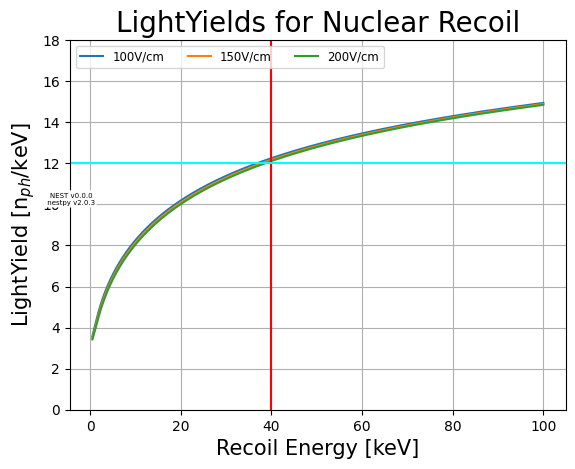

In [ ]:
 yields_plot_NR([100,150,200],'Light')
 plt.axvline(x=40,color="red")
 plt.axhline(y=12.,color='cyan')

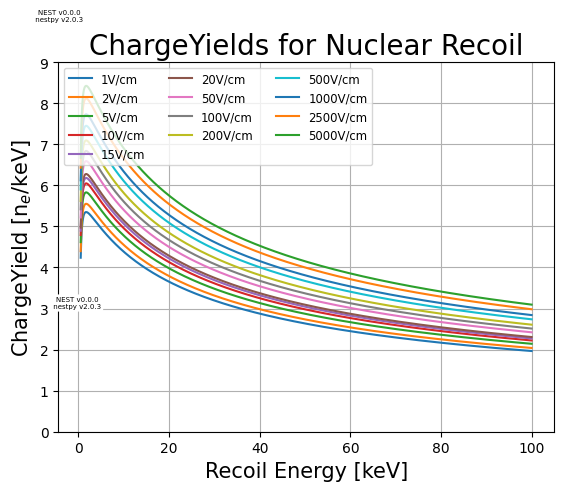

In [ ]:
all_fields=[1,2,5,10,15,20,50,100,200,500,1000,2500,5000]
yields_plot_NR(all_fields,'Charge')

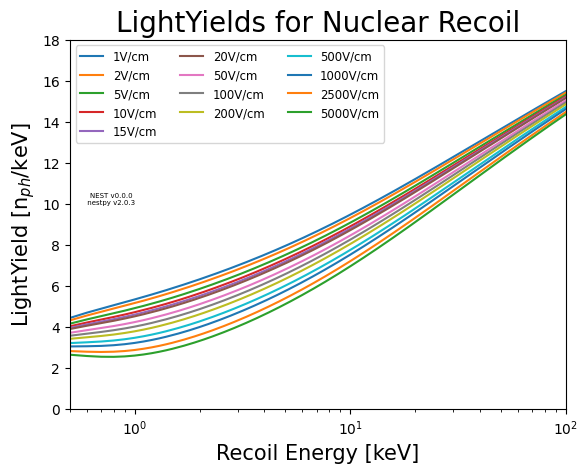

In [ ]:
yields_plot(all_fields,'Light')

In [ ]:
import nestpy

# Iterate through possible values of INTERACTION_TYPE
for i in range(10):  # Adjust range based on how many interaction types exist
    interaction = nestpy.INTERACTION_TYPE(i)
    print(f"Value {i}: {interaction}")
print(dir(nestpy.INTERACTION_TYPE))

interaction = nestpy.INTERACTION_TYPE(7)

Value 0: INTERACTION_TYPE.NR
Value 1: INTERACTION_TYPE.WIMP
Value 2: INTERACTION_TYPE.B8
Value 3: INTERACTION_TYPE.DD
Value 4: INTERACTION_TYPE.AmBe
Value 5: INTERACTION_TYPE.Cf
Value 6: INTERACTION_TYPE.ion
Value 7: INTERACTION_TYPE.gammaRay
Value 8: INTERACTION_TYPE.beta
Value 9: INTERACTION_TYPE.CH3T
['AmBe', 'B8', 'C14', 'CH3T', 'Cf', 'DD', 'Kr83m', 'NR', 'NoneType', 'WIMP', '__and__', '__class__', '__delattr__', '__dir__', '__doc__', '__entries', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lt__', '__members__', '__module__', '__ne__', '__new__', '__or__', '__rand__', '__reduce__', '__reduce_ex__', '__repr__', '__ror__', '__rxor__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__xor__', 'beta', 'gammaRay', 'ion', 'name', 'value']


In [ ]:
def nest_curve_ER(field, yield_type):
    # Generate energies from 0.5 keV to 100 keV
    energies = np.linspace(0.5, 100, 1000).reshape(-1, 1)  # 1000 points between 0.5 keV and 100 keV
    energies = np.broadcast_to(energies, (len(energies), 1))

    kwargs = {'energy': energies, 'drift_field': field}

    if yield_type == "Charge":
        yields = ElectronYield(interaction=nestpy.INTERACTION_TYPE.beta, **kwargs) / energies
    elif yield_type == "Light":
        yields = PhotonYield(interaction=nestpy.INTERACTION_TYPE.beta, **kwargs) / energies
    else:
        raise ValueError("Invalid yield_type. Choose 'Charge' or 'Light'.")

    return energies, yields

In [ ]:
#version_textbox='NEST v{0} \n nestpy v{1}'.format(nestpy.__nest_version__,nestpy.__version__)
bbox= dict(boxstyle='round',fc='1.00',edgecolor='none')
def yields_plot_ER(fields,yield_type,savefig=False):
  subplot1=plt.subplot(1,1,1)

  title =[yield_type,'Yields for Electron Recoil']
  title = ''.join(str(v) for v in title)
  subplot1.set_title (title,fontsize=20)

  for field in fields :
    name =[field,'V/cm']
    name =''.join(str(v) for v in name)
    subplot1.plot(nest_curve_ER(field,yield_type)[0],nest_curve_ER(field,yield_type)[1],label=name)

  if yield_type=='Charge':
     subtitle=[yield_type,"Yield [n$_e$/keV]"]
     plt.ylim(0,9)
     subplot1.text(5,3,version_textbox,bbox=bbox,horizontalalignment='right',fontsize=5)
    # plt.axhline(y=5.9, color='red', linestyle='--', label='y = 5.9')
     #plt.axvline(x=10, color='red', linestyle='--', label='x = 10')
     #plt.axvline(x=50, color='black', linestyle='--', label='x = 50')
     #plt.axhline(y=3.6, color='black', linestyle='--', label='y = 3.6')
  if yield_type=='Light' :
     subtitle=[yield_type,"Yield [n$_{ph}$/keV]"]
     plt.ylim(0,18)
  subplot1.legend(loc='upper left',fontsize ='small',ncol=3)
  subplot1.text(1,10,version_textbox,bbox=bbox,horizontalalignment='right',fontsize=5)
  subtitle = ''.join(str(v) for v in subtitle)
  subplot1.set_ylabel(subtitle, fontsize=15)

  subplot1.set_xscale('linear')
  subplot1.set_xlim(0, 20)
  subplot1.set_ylim(0,70)

  subplot1.set_xlabel('Recoil Energy [keV]',fontsize=15)
  subplot1.margins(0)
  plt.grid()



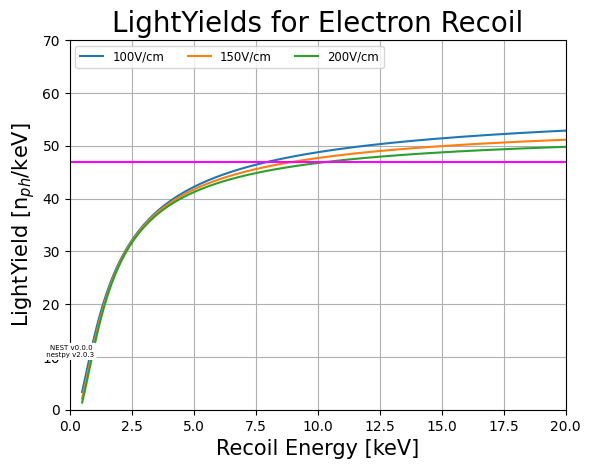

In [ ]:
yields_plot_ER([100,150,200],'Light')
plt.axhline(y=47,color='magenta')

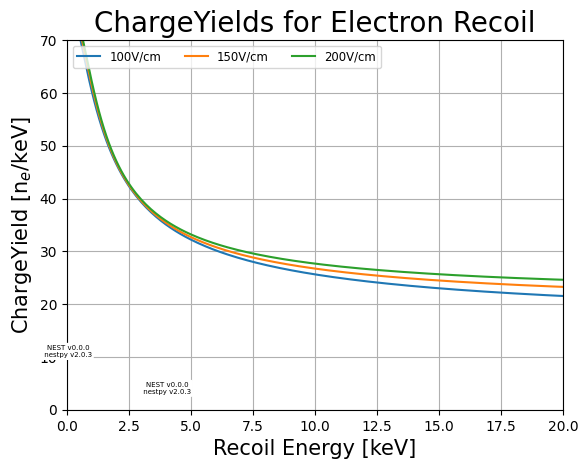

In [ ]:
yields_plot_ER([100,150,200],'Charge')